## Task 2:
1. Select any dataset that will suit for clustering
2. Observe your data
3. Apply some data preparation
4. Apply clustering model
5. Visualise your obtained clusters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import (AffinityPropagation, AgglomerativeClustering,
                             KMeans, SpectralClustering)
from sklearn import datasets, metrics
from sklearn.decomposition import PCA

### Select any dataset that will suit for clustering

In [2]:
df=pd.read_csv("winequality-red.csv")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### Data preparation

In [5]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

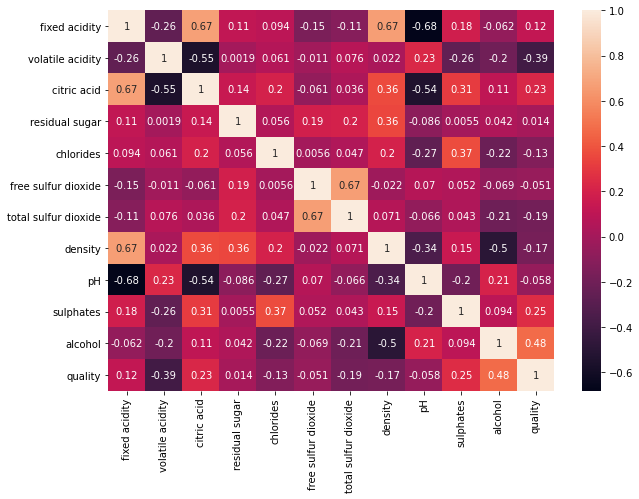

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot= True)

In [8]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### KMeans

In [9]:
X=df.drop('quality',axis=1)
y=df['quality']

C:\Users\zhani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\zhani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\zhani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\zhani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

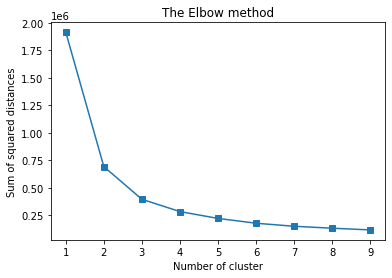

In [10]:
num = []

for i in range(1, 10):
    kmean = KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmean.fit(X)
    num.append(kmean.inertia_)

plt.plot(range(1, 10), num,  marker="s")

plt.title('The Elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of squared distances')
plt.show()

We see that  𝐽(𝐶𝑘)  decreases significantly until the number of clusters is 3 and then does not change as much anymore. This means that the optimal number of clusters is 3.

C:\Users\zhani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Text(0.5, 1.0, 'PCA')

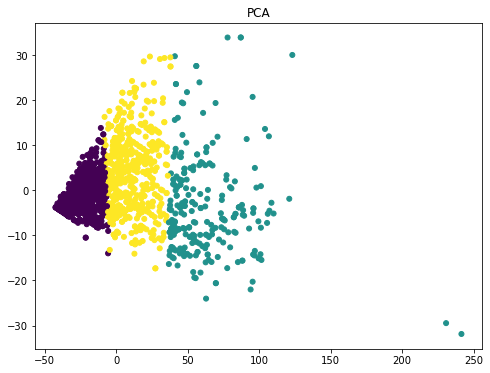

In [17]:
kmean = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmean.fit(X)
pca = PCA()
result = pca.fit_transform(df)
plt.figure(figsize=(8,6))
plt.scatter(result[:,0], result[:,1], c=kmean.labels_, s=25, cmap='viridis')
plt.title('KMeans')

### Affinity

Text(0.5, 1.0, 'PCA')

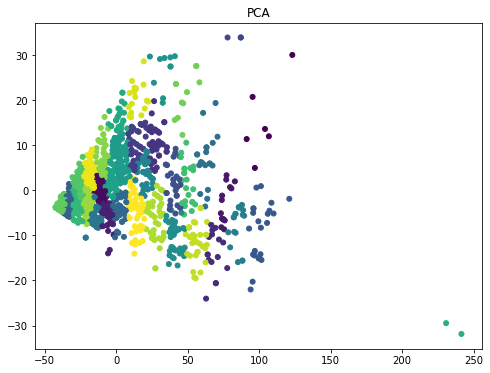

In [13]:
aff = AffinityPropagation(random_state=1)
aff.fit(X)
pca = PCA()
result = pca.fit_transform(df)
plt.figure(figsize=(8,6))
plt.scatter(result[:,0], result[:,1], c=aff.labels_, s=25, cmap='viridis')
plt.title('Affinity')

### Spectral

C:\Users\zhani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Text(0.5, 1.0, 'PCA')

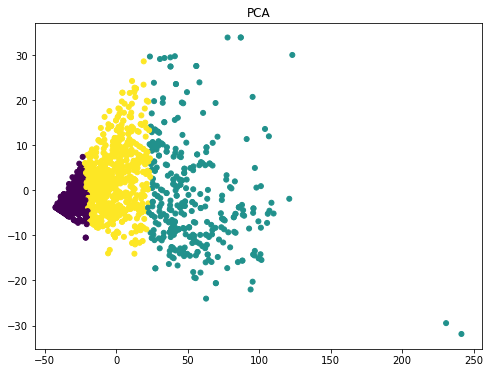

In [18]:
Spec = SpectralClustering(n_clusters=3, random_state=1, affinity="nearest_neighbors")
Spec.fit(X)
pca = PCA()
result = pca.fit_transform(df)
plt.figure(figsize=(8,6))
plt.scatter(result[:,0], result[:,1], c=Spec.labels_, s=25, cmap='viridis')
plt.title('Spectral')

### Agglomerative

Text(0.5, 1.0, 'PCA')

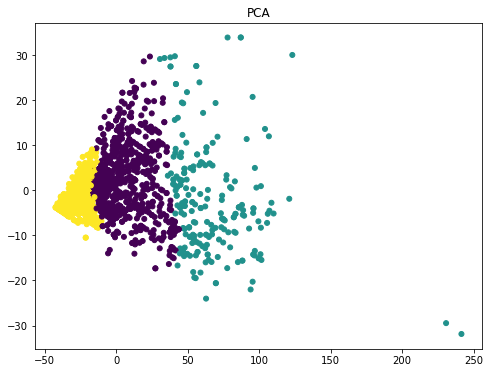

In [19]:
Agg = AgglomerativeClustering(n_clusters=3)
Agg.fit(X)
pca = PCA()
result = pca.fit_transform(df)
plt.figure(figsize=(8,6))
plt.scatter(result[:,0], result[:,1], c=Agg.labels_, s=25, cmap='viridis')
plt.title('Agglomerative)

### Accuracy

In [20]:
alg = []
alg.append(KMeans(n_clusters=3, random_state=1))
alg.append(AffinityPropagation(random_state=1))
alg.append(
    SpectralClustering(n_clusters=3, random_state=1, affinity="nearest_neighbors")
)
alg.append(AgglomerativeClustering(n_clusters=3))

data = []
for i in alg:
    i.fit(X)
    data.append(
        (
            {
                "ARI": metrics.adjusted_rand_score(y, i.labels_),
                "AMI": metrics.adjusted_mutual_info_score(y, i.labels_),
                "Homogenity": metrics.homogeneity_score(y, i.labels_),
                "Completeness": metrics.completeness_score(y, i.labels_),
                "V-measure": metrics.v_measure_score(y, i.labels_),
                "Silhouette": metrics.silhouette_score(X, i.labels_),
            }
        )
    )

full = pd.DataFrame(
    data=data,
    columns=["ARI", "AMI", "Homogenity", "Completeness", "V-measure", "Silhouette"],
    index=["K-means", "Affinity", "Spectral", "Agglomerative"],
)

full

C:\Users\zhani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\zhani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.002357,0.033358,0.033372,0.039683,0.036255,0.519745
Affinity,-0.000340,0.027249,0.091594,0.033426,0.048978,0.258082
Spectral,0.020670,0.030871,0.031795,0.035815,0.033685,0.446729
Agglomerative,0.008722,0.034823,0.034640,0.041418,0.037727,0.473985
